<a href="https://colab.research.google.com/github/rsarpongstreetor/rl/blob/main/Copy_of_optimized_copy_of_Fuel_price_Environment_MARLANN4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
!pip3 install torch
!pip3 install torchrl
!pip3 install tensordict
!pip3 install torchview
!pip3 install torchvision
!pip3 install pydrive
!pip3 install ipython-autotime


In [40]:
import multiprocessing
import torch
import torch.nn as nn
from torch import nn
from tensordict.nn import TensorDictModule
from tensordict.nn.distributions import NormalParamExtractor

from torchrl.collectors import SyncDataCollector
from torchrl.data.replay_buffers import ReplayBuffer
from torchrl.data.replay_buffers.samplers import SamplerWithoutReplacement
from torchrl.data.replay_buffers.storages import LazyTensorStorage
from torchrl.envs import (Compose, DoubleToFloat, ObservationNorm, StepCounter,TransformedEnv )
from torchrl.envs.libs.gym import GymEnv
from torchrl.envs.utils import check_env_specs, ExplorationType, set_exploration_type
from torchrl.modules import ProbabilisticActor, TanhNormal, ValueOperator
from torchrl.objectives import ClipPPOLoss
from torchrl.objectives.value import GAE
from tqdm import tqdm
import google.colab
import pygame
from gym.spaces import Discrete, Box, Dict, Tuple, MultiBinary, MultiDiscrete
import random
import os
import math
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple, deque
from itertools import count
import plotly.express as px
import pandas as pd

import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets
from google.colab import drive
google.colab.drive.mount('/content/drive')
from collections import defaultdict
from typing import Optional
import torchrl
import numpy as np
from tensordict import TensorDict, TensorDictBase
from torchrl.modules import MultiAgentConvNet
from torchrl.data import BoundedTensorSpec, CompositeSpec, UnboundedContinuousTensorSpec,DiscreteTensorSpec
from torchrl.envs import (
    CatTensors,
    EnvBase,
    Transform,
    TransformedEnv,
    UnsqueezeTransform,
)

from torchrl.envs.transforms.transforms import _apply_to_composite
from torchrl.envs.utils import check_env_specs, step_mdp
import tensordict as td
from torchrl.envs import EnvBase
from torch import  tensor
from torchrl.envs.transforms import TransformedEnv
import tensordict

from torchrl.envs import RewardSum, TransformedEnv
from torchrl.envs.libs.vmas import VmasEnv
from torchrl.envs.utils import check_env_specs

# Multi-agent network
from torchrl.modules import MultiAgentMLP, ProbabilisticActor, TanhNormal

# Loss
from torchrl.objectives import ClipPPOLoss, ValueEstimators

# Utils
torch.manual_seed(0)
from matplotlib import pyplot as plt
from typing import Union, Sequence, Type

import torch.nn as nn
from torchrl.envs.utils import check_env_specs, step_mdp
from torchrl.modules import ProbabilisticActor
#####################################






Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import collections
import numpy as np  # Import NumPy
k=0

class DDataenv():

  #Initialize
  def __init__(self):
    # Load data here
      self.DDDDataDic =np.empty((8,7), dtype=np.float32)
      # We have 3 actions, corresponding to "increase", "decrease", "no change " in fuel price
      #self.action_space = spaces.Discrete(3)
      # Observations are dictionaries with the agent's Observation which are.
      # Forex, Crude oil pric, Fuel price, reward, action
      self.vvmm=np.empty((8,10), dtype=np.float32)
      self.k=k

  def _downl_Data(self):
        with open('/content/drive/MyDrive/deep learning codes/EIAAPI_DOWNLOAD/solutions/mergedata/DataDic.pt','rb') as rpp:

          DataDic = torch.load(rpp,weights_only=True)
        DDataDic=DataDic[0]
        DDDDataDic=DDataDic
        return DDDDataDic

  def _get_obs_stats(self):
        self.vvmm_dict = {}
        observation=[]
        vvmm_dict={},
        vvnn=[]
        vvnv={}
        DD=[]
        DDDataDic=[]
        aadd={}
        aadd1={}
        aadd2={}

        aabb=[]
        actionState=[]
        rewardState=[]
        obsState=[]
        obsFuels=[]
        rewardFuels=[]
        actionFuels=[]
        Envvstatesinput=[]
        Envvfuelsinput=[]
         #observation
        DDDataDic=self._downl_Data()
        observation=DDDataDic[np.random.choice(DDDataDic.shape[0], 1, replace=False),:].numpy().astype(np.float32)
        observation.flatten()
        aabb=pd.DataFrame(observation)
        aabb.transpose()
        aabb.columns=['Forex','WTI','Brent','OPEC','Fuelprice5','Fuelprice6','Fuelprice7','Fuelprice8','Fuelprice9','Fuelprice10','Fuelprice11','Fuelprice12','Fuelprice13',
                     'reward0','reward1','reward2','reward3','reward4','reward5','reward6','reward7','reward8','reward9','reward10','reward11','reward12',
                    'action0','action1','action2','action3','action4','action5','action6','action7','action8','action9','action10','action11','action12',]




        obsState=np.array(aabb.iloc[0,0:4])
        rewardState=np.array(aabb.iloc[0,13:17])
        actionState=np.array(aabb.iloc[0,26:30])
        obsfuels=np.array(aabb.iloc[0,4:13])
        rewardfuels=np.array(aabb.iloc[0,17:26])
        actionfuels=np.array(aabb.iloc[0,30:39])






        aadd1=pd.concat((pd.Series(obsState),pd.Series(rewardState),pd.Series(actionState)),axis=1)

        aadd1=pd.DataFrame(aadd1)
        aadd1.columns=['obsState','rewardState','actionState']






        aadd2=pd.concat([pd.Series(obsfuels),pd.Series(rewardfuels),pd.Series(actionfuels)],axis=1)

        aadd2=pd.DataFrame(aadd2)
        aadd2.columns=['obsFuels','rewardFuels','actionFuels']






        obsState_max=[]
        obsState_min=[]
        rewardState_max=[]
        rewardState_min=[]
        actionState_max=[]
        actionState_min=[]
        obsfuels_max=[]
        obsfuels_min=[]
        rewardfuels_max=[]
        rewardfuels_min=[]
        actionfuels_max=[]
        actionfuels_min=[]


        DD = DDDataDic.clone()
        DD.reshape(-1, DD.shape[-1])
        vvmm=np.zeros((8,DD.shape[1]))
        df = pd.DataFrame(DD)

        vvmm = df.describe()
        vvmm.columns=['Forex','WTI','Brent','OPEC','Fuelprice5','Fuelprice6','Fuelprice7','Fuelprice8','Fuelprice9','Fuelprice10','Fuelprice11','Fuelprice12','Fuelprice13',
                      'reward0','reward1','reward2','reward3','reward4','reward5','reward6','reward7','reward8','reward9','reward10','reward11','reward12',
                      'action0','action1','action2','action3','action4','action5','action6','action7','action8','action9','action10','action11','action12',]

        vvmm.index=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
        vvmm1=pd.concat((vvmm.iloc[:,0:4],vvmm.iloc[:,13:17],vvmm.iloc[:,26:30]),axis=1)
        vvmm2=pd.concat((vvmm.iloc[:,4:13] ,vvmm.iloc[:,17:26],vvmm.iloc[:,30:39]),axis=1)

        vvmm1.index=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
        vvmm2.index=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']





        ii= [3, 7]
       # vvmm.astype(dtype=np.float32, copy=True, errors='list')
        xx1=[]
        yy1=[]
        xxx1=[]
        yyy1=[]
        vvvv1=[]

        for k in range(len(vvmm1.columns)):
          for i in ii:
            xx1.append(vvmm1.iat[i, k])


        for k in range(len(vvmm1.columns)):
          for i in ii:
            yy1.append(str(vvmm1.index[i]) + '.' + str(vvmm1.columns[k]))

        xx1=np.array(xx1)
        xx1 = xx1.reshape(1,24)

        yyy1=iter(yy1)
        vvnn1=pd.DataFrame(xx1,dtype=np.float32)


        vvnn1.columns=yyy1






        for j in range(24):
          if j < 4:
            obsState_min.append(((vvnn1.iloc[0,2*j  :2*j+1]).squeeze()))
            obsState_max.append(((vvnn1.iloc[0,2*j+1:2*j+2]).squeeze()))
            rewardState_min.append(((vvnn1.iloc[0,2*j+8:2*j+9]).squeeze()))
            rewardState_max.append(((vvnn1.iloc[0,2*j+9:2*j+10]).squeeze()))
            actionState_min.append(((vvnn1.iloc[0,2*j+16:2*j+17]).squeeze()))
            actionState_max.append(((vvnn1.iloc[0,2*j+17:2*j+18]).squeeze()))


        ii= [3, 7]
       # vvmm.astype(dtype=np.float32, copy=True, errors='list')
        xx2=[]
        yy2=[]
        xxx2=[]
        yyy2=[]
        vvvv2=[]

        for k in range(len(vvmm2.columns)):
          for i in ii:
            xx2.append(vvmm2.iat[i, k])


        for k in range(len(vvmm2.columns)):
          for i in ii:
            yy2.append(str(vvmm2.index[i]) + '.' + str(vvmm2.columns[k]))

        xx2=np.array(xx2)
        xx2 = xx2.reshape(1,54)

        yyy2=iter(yy2)
        vvnn2=pd.DataFrame(xx2,dtype=np.float32)


        vvnn2.columns=yyy2



        for j in range(54):
          if j < 9:
            obsfuels_max.append(((vvnn2.iloc[0,2*j:2*j+1])))
            obsfuels_min.append(((vvnn2.iloc[0,2*j+1:2*j+2])))

            rewardfuels_min.append(((vvnn2.iloc[0,2*j+17:2*j+18])))
            rewardfuels_max.append(((vvnn2.iloc[0,2*j+18:2*j+19])))

            actionfuels_max.append(((vvnn2.iloc[0,2*j+36:2*j+37])))
            actionfuels_min.append(((vvnn2.iloc[0,2*j+37:2*j+38])))

        obsfuels_max=np.array(obsfuels_max).reshape(-1)
        obsfuels_min=np.array(obsfuels_min).reshape(-1)
        actionfuels_max=np.array(actionfuels_max).reshape(-1)
        actionfuels_min=np.array(actionfuels_min).reshape(-1)
        rewardfuels_max=np.array(rewardfuels_max).reshape(-1)
        rewardfuels_min=np.array(rewardfuels_min).reshape(-1)




        vvmm1_dict=pd.concat([pd.Series(obsState_max),pd.Series(obsState_min),pd.Series(rewardState_max),pd.Series(rewardState_min),pd.Series(actionState_max),pd.Series(actionState_min)],axis=1)

        vvmm1_dict.columns=['obsState_max','obsState_min','rewardState_max','rewardState_min','actionState_max','actionState_min']

        vvmm2_dict=pd.concat([pd.Series(obsfuels_max),pd.Series(obsfuels_min),pd.Series(rewardfuels_max),pd.Series(rewardfuels_min),pd.Series(actionfuels_max),pd.Series(actionfuels_min)],axis=1)

        vvmm2_dict.columns=['obsFuels_min','obsFuels_max','rewardFuels_min','rewardFuels_max','actionFuels_min','actionFuels_max']





        fv=pd.concat((vvmm2_dict,aadd2),axis=1)
        sv=pd.concat((vvmm1_dict,aadd1),axis=1)
        ssv=np.zeros((9,9))
        ssv=pd.DataFrame(ssv)
        ssv.columns=sv.columns
        sssv=sv+ssv
        sv=sssv
        svfv=pd.concat((sv,fv),axis=1)







        #result=pd.concat([aadd1,vvmm1_dict], axis=1)
        #result.columns=['obsState','actionState','reward','obsState_max','obsState_min','rewardState_max','rewardState_min','actionState_max','actionState_min']
       # result2=pd.concat([aadd2,vvnn2], axis=1)
       # resulttensor=torch.tensor(result.to_numpy())
        #print(resulttensor)
        result=svfv.to_dict(orient='list')

        return result



In [ ]:
my_object=DDataenv()
rresult=my_object._get_obs_stats()


In [43]:
def _step(tensordict):
    # ...
    td=env.gen_params()




    # Extract the necessary DataFrames from rresult
    # Extract the variables needed in _make_spec
    n_agents =  env.n_agents
    agent_tds = []
    agents = [{} for _ in range(n_agents)]
    # Collect observations in a list first
    # Iterate over the DataFrame

    for i in range(n_agents):
        # Initialize lists to store data for each agent within the batch
        agent_i_obs = []
        agent_i_action = []
        agent_i_rew = []
        agent_i_new_obs = []

        agent_obs_list=[]
        agent_reward_list=[]
        agent_action_list=[]
        newobs_obs_list=[]

        for j in range(env.batch_size[0]):
            obsState=td['params','obsState'].clone().detach()
            rewardState=td['params','rewardState'].clone().detach()
            actionState=td['params','actionState'].clone().detach()
            obsFuels=td['params','obsFuels'].clone().detach().unsqueeze((-1))
            rewardFuels=td['params','rewardFuels'].clone().detach().unsqueeze((-1))
            actionFuels=td['params','actionFuels'].clone().detach().unsqueeze((-1))
            obs=[]
            reward=[]
            action=[]
            obsj=[]
            rewardj=[]
            actionj=[]
            newobs=[]
            obs=torch.cat(((torch.mul((obsState[0:4]),torch.ones(len(obsFuels),1))),obsFuels),dim=1)
            reward=rewardFuels
            action=actionFuels
            for i,[agent_obs,agent_reward,agent_action], in enumerate(zip(obs,reward,action)):
                agent_reward_list.append(agent_reward)
                agent_action_list.append(agent_action)
                newobs=torch.add(agent_obs,((agent_action)*agent_reward))
                newobs_obs_list.append(newobs)

                torch.stack(agent_reward_list, dim=1)
                torch.stack(agent_action_list, dim=1)
                torch.stack(newobs_obs_list, dim=1)




            obsj.append(newobs_obs_list)
            rewardj.append(agent_reward_list)
            actionj.append(agent_action_list)




        agent_reward = torch.stack([torch.stack(inner_list) for inner_list in rewardj], dim=0)
        agent_action = torch.stack([torch.stack(inner_list) for inner_list in actionj], dim=0)
        agent_obs = torch.stack([torch.stack(inner_list) for inner_list in  obsj], dim=0)





      # Ensure agent_obs_tensor has the correct batch dimension
        observation  = agent_obs.float()
        episode_reward  = agent_reward.float()
        agent_action_tensor =  agent_action.float()



    dones = torch.zeros((env.batch_size[0], n_agents), dtype=torch.bool)
    nextt = TensorDict({
      "agents": {
            "observation": observation[:, 0:n_agents, :], # Make sure 'observation' is included here
            "reward":episode_reward[:, 0:n_agents, :],
          },

       "terminated": dones.clone(),


    }, batch_size=env.batch_size, device=env.device)
    return nextt



def _reset(self, tensordict=None, **kwargs):

    if tensordict is None:
      td = self.gen_params(batch_size=self.batch_size)
      obsState_max=td['params','obsState_max'].clone().detach()
      obsState_min=td['params','obsState_min'].clone().detach()
      obsFuels_max=td['params','obsFuels_max'].clone().detach()
      obsFuels_min=td['params','obsFuels_min'].clone().detach()
      n_agents = self.n_agents



      # Initialize agent list here
      batchtentensor=[]
      agents = [{} for _ in range(self.n_agents)]
      agents = [{"id": i, "data": torch.randn(5)} for i in range(self.n_agents)]
      agent_obs_list = [] # Collect observations in a list first
      agent_tds = []
      agent_obs_tensor=[]


      # Iterate over the DataFrame
        # Iterate over the DataFrame
       # Iterate over the DataFrame
      random_numbers = torch.rand((self.batch_size[0],5), generator=self.rng, device=self.device)
      low_x=torch.cat((torch.mul(obsState_min[:,0:4],torch.ones(9,1)),obsFuels_min.T ),dim=1)
      high_x=torch.cat((torch.mul(obsState_max[:,0:4],torch.ones(9,1)),obsFuels_max.T ),dim=1)
      obs =  torch.add(torch.mul(random_numbers, torch.add(high_x, -low_x)), low_x)
      obs= obs.float()
          # Iterate over the DataFrame

      for i, agent_obs in enumerate(obs):
          agent_obs_list.append(agent_obs)
          # Ensure agent_obs_tensor has the correct batch dimension
      agent_obs_tensor = torch.stack(agent_obs_list, dim=0).unsqueeze(0)
        # Now agent_obs_tensor has shape (1, num_agents, 5)


      dones = torch.zeros((self.batch_size[0], n_agents), dtype=torch.bool)

      resett = TensorDict(
        {
        "agents": {  # Add "agents" key
            "observation": agent_obs_tensor[:, 0:n_agents, :],  # Directly use agent_obs_tensor
        },
        "terminated": dones.clone(),

    }, batch_size=self.batch_size[0], device=self.device)
    return resett


# @title Default title text
def _make_spec(self, td_agents):
    agent =[{}]*self.n_agents
    action_specs = []
    observation_specs = []
    reward_specs = []

    # Initialize result lists outside the loop


    td = self.gen_params()
    obsState_max=td_agents['params','obsState_max'].clone().detach()
    obsState_min=td_agents['params','obsState_min'].clone().detach()
    rewardState_max=td_agents['params','rewardState_max'].clone().detach()
    rewardState_min=td_agents['params','rewardState_min'].clone().detach()
    actionState_max=td_agents['params','actionState_max'].clone().detach()
    actionState_min=td_agents['params','actionState_min'].clone().detach()
    obsFuels_max=td_agents['params','obsFuels_max'].clone().detach()
    obsFuels_min=td_agents['params','obsFuels_min'].clone().detach()
    rewardFuels_max=td_agents['params','rewardFuels_max'].clone().detach()
    rewardFuels_min=td_agents['params','rewardFuels_min'].clone().detach()
    actionFuels_max=td_agents['params','actionFuels_max'].clone().detach()
    actionFuels_min=td_agents['params','actionFuels_min'].clone().detach()




    low=torch.cat((torch.multiply(torch.ones((self.n_agents,1)),torch.tensor(self.rewstin.values)[:,None])),torch.reshape(torch.tensor(self.rewfmin.values),(self.n_agents, 1)),dim=1)
    for i in range(self.n_agents):
        agent[i]["action_spec"] = BoundedTensorSpec(low = actionFuels_min[i:i+1].reshape(1,),
                                                     high = actionFuels_max[i:i+1].reshape(1,),
                                                     shape=(1,),
                                                     dtype=torch.float32),

        agent[i]["reward_spec"] =  BoundedTensorSpec(low =rewardFuels_min[i:i+1].reshape(1,),
                                                     high = rewardFuels_max[i:i+1].reshape(1,),
                                                     shape=(1,),
                                                     dtype=torch.float32),
        agent[i]["reward_spec"] = BoundedTensorSpec(low = rewardFuels_min[i:i+1].reshape(1,),
                                                     high = rewardFuels_max[i:i+1].reshape(1,),
                                                     shape=(1,),
                                                     dtype=torch.float32),



        agent[i]["observation_spec"]  = BoundedTensorSpec(low = torch.cat((obsState_min[0:4],obsFuels_min[i:i+1]),1).reshape(1, 5),
                                                          high = torch.cat((obsState_max[0:4],obsFuels_max[i:i+1]),1).reshape(1, 5),
                                                          shape=(1,5),
                                                          dtype=torch.float32),


        action_specs.append(agent[i]["action_spec"])
        reward_specs.append(agent[i]["reward_spec"])
        observation_specs.append(agent[i]["observation_spec"])



# Construct CompositeSpec objects with the correct nesting and batch size
def _make_spec_updated(self, td_agents):
    agent =[{}]*self.n_agents
    action_specs = []
    observation_specs = []
    reward_specs = []

    # Initialize result lists outside the loop
    obsState_max=td_agents['params','obsState_max'].clone().detach()
    obsState_min=td_agents['params','obsState_min'].clone().detach()
    rewardState_max=td_agents['params','rewardState_max'].clone().detach()
    rewardState_min=td_agents['params','rewardState_min'].clone().detach()
    actionState_max=td_agents['params','actionState_max'].clone().detach()

    actionState_min=td_agents['params','actionState_min'].clone().detach()
    obsFuels_max=td_agents['params','obsFuels_max'].clone().detach()
    obsFuels_min=td_agents['params','obsFuels_min'].clone().detach()
    rewardFuels_max=td_agents['params','rewardFuels_max'].clone().detach()
    rewardFuels_min=td_agents['params','rewardFuels_min'].clone().detach()
    actionFuels_max=td_agents['params','actionFuels_max'].clone().detach()
    actionFuels_min=td_agents['params','actionFuels_min'].clone().detach()
    result55=[]
    result55=[]
    result44=[]
    result33=[]
    result22=[]
    result11=[]
    result00=[]
    result555=[]
    result444=[]
    result333=[]
    result222=[]
    result111=[]
    result000=[]
    for i in range(self.n_agents):  # Make sure the loop iterates 9 times
        result55.append(actionFuels_min[i:i+1])
        result44.append(actionFuels_max[i:i+1])
        result33.append(rewardFuels_min[i:i+1])
        result22.append(rewardFuels_max[i:i+1])
        result11.append(torch.cat((obsState_min[0:4],obsFuels_min[i:i+1]),0).reshape(1, 5))
        result00.append(torch.cat((obsState_max[0:4],obsFuels_max[i:i+1]),0).reshape(1, 5))

    result555= torch.stack(result55,dim=0) # Transpose dimensions 0 and 1
    result444 =torch.stack(result44,dim=0)
    result333 =torch.stack(result33,dim=0)
    result222 =torch.stack(result22,dim=0)
    result111 =torch.stack(result11,dim=0)
    result000 =torch.stack(result00,dim=0)
    print(result555)


    self.unbatched_action_spec = CompositeSpec(
    {"agents": CompositeSpec(
            {"action": BoundedTensorSpec(
                low=result555,  # Ensure these tensors have the correct shape
                high=result444,
                shape=(self.n_agents, 1),  # Explicitly set the shape here
                dtype=torch.float32,
             )}
        )}
    )


    self.unbatched_reward_spec = CompositeSpec(
    {"agents": CompositeSpec(
            {"reward": BoundedTensorSpec(
                low=result333,
                high=result222,
                shape=(self.n_agents,1),
                dtype=torch.float32,
             )}
        )}
    )

    self.unbatched_observation_spec = CompositeSpec(  # Change to unbatched_observation_spec
    {"agents": CompositeSpec(
            {"observation": BoundedTensorSpec(
                low=result111.squeeze(1),
                high=result000.squeeze(1),
                shape=(self.n_agents,5),
                dtype=torch.float32,
             )}
        )}
    )



    self.unbatched_done_spec = DiscreteTensorSpec(n = 2,shape =torch.Size((self.n_agents,5)), dtype = torch.bool)

    # Now you can expand the specs
    self.unbatched_done_spec = DiscreteTensorSpec(
        n=2, shape=torch.Size((self.n_agents,)), dtype=torch.bool
    )

    # Now you can expand the specs
    self.action_spec = self.unbatched_action_spec.expand(
        *self.batch_size, *self.unbatched_action_spec.shape
    )
    self.observation_spec = self.unbatched_observation_spec.expand(
        *self.batch_size, *self.unbatched_observation_spec.shape
    )  # Use unbatched_observation_spec
    self.reward_spec = self.unbatched_reward_spec.expand(
        *self.batch_size, *self.unbatched_reward_spec.shape
    )
    self.done_spec = self.unbatched_done_spec.expand(
        *self.batch_size, *self.unbatched_done_spec.shape
    )



def make_composite_from_td(td):
    # custom function to convert a ``tensordict`` in a similar spec structure
    # of unbounded values.
    composite = CompositeSpec(
        {
            key: make_composite_from_td(tensor)
            if isinstance(tensor, TensorDictBase)
            else UnboundedContinuousTensorSpec(
                dtype=tensor.dtype, device=tensor.device, shape=tensor.shape
            )
            for key, tensor in td.items()
        },
        shape=td.shape,
    )
    return composite



def gen_params(batch_size=torch.Size()) -> TensorDictBase:
    """Returns a ``tensordict`` containing the input tensors."""
    if batch_size is None:
      batch_size = []
    my_object=DDataenv()
    ac=my_object._get_obs_stats()
    if batch_size:
        # Assuming 'ac' is a dictionary of tensors, expand each tensor
        ac = {k: torch.tensor(v).expand(*batch_size, *torch.tensor(v).shape)  for k, v in ac.items()} # Convert lists to tensors before expanding


    td = TensorDict({

          "params": ac,
          }
        ,
        batch_size=batch_size,
        device=torch.device("cpu"),
    )
    if batch_size:
      td = td.expand(batch_size).contiguous()
    return td





def _set_seed(self, seed:45):
    rng = torch.manual_seed(seed)
    self.rng = rng





class AnFuelpriceEnv(EnvBase):
    metadata = {
        "render_modes": ["human", "rgb_array"],
        "render_fps": 30,
    }
    batch_locked = False

    def __init__(self,td_params=None, seed=None, device="cpu"):
        if td_params is None:
            td_params = self.gen_params()


        # Extract the variables needed in _make_spec
        self.n_agents = 2

        self.agent_tds = []
        self.agents = [{} for _ in range(self.n_agents)]






        super().__init__(device=device, batch_size=[1])
        self._make_spec(td_params)
        if seed is None:
            seed = torch.empty((), dtype=torch.int64).random_().item()
        self.set_seed(seed)



    # Helpers: _make_step and gen_params
    gen_params =staticmethod(gen_params)
    _make_spec = _make_spec_updated
    # Mandatory methods: _step, _reset and _set_seed
    _reset = _reset
    _step = staticmethod(_step)
    _set_seed = _set_seed

env = AnFuelpriceEnv()
print("\n*action_spec:", env.full_action_spec)
print("\n*reward_spec:", env.full_reward_spec)
print("\n*done_spec:", env.full_done_spec)
print("\n*observation_spec:", env.observation_spec)

print("\n-action_keys:", env.action_keys)
print("\n-reward_keys:", env.reward_keys)
print("\n-done_keys:", env.done_keys)

print("input_spec:", env.input_spec)
print("action_spec (as defined by input_spec):", env.action_spec)
print("reward_spec:", env.reward_spec)
td = env.reset()
print("reset tensordict", td)
check_env_specs(env)



tensor([[0.],
        [0.]], dtype=torch.float64)

*action_spec: CompositeSpec(
    agents: CompositeSpec(
        action: BoundedTensorSpec(
            shape=torch.Size([1, 2, 1]),
            space=ContinuousBox(
                low=Tensor(shape=torch.Size([1, 2, 1]), device=cpu, dtype=torch.float32, contiguous=True),
                high=Tensor(shape=torch.Size([1, 2, 1]), device=cpu, dtype=torch.float32, contiguous=True)),
            device=cpu,
            dtype=torch.float32,
            domain=continuous),
        device=cpu,
        shape=torch.Size([1])),
    device=cpu,
    shape=torch.Size([1]))

*reward_spec: CompositeSpec(
    agents: CompositeSpec(
        reward: BoundedTensorSpec(
            shape=torch.Size([1, 2, 1]),
            space=ContinuousBox(
                low=Tensor(shape=torch.Size([1, 2, 1]), device=cpu, dtype=torch.float32, contiguous=True),
                high=Tensor(shape=torch.Size([1, 2, 1]), device=cpu, dtype=torch.float32, contiguous=True)),
  

2024-08-29 23:34:16,213 [torchrl][INFO] check_env_specs succeeded!


Environment

In [44]:
env = TransformedEnv(
    env,
    RewardSum(in_keys=[env.reward_key], out_keys=[("agents", "episode_reward")]),
    )


#base_env1 = env
#env = TransformedEnv(
   # base_env1,
    # ``Unsqueeze`` the observations that we will concatenate
    #UnsqueezeTransform(
        #unsqueeze_dim=-2,
        # Access 'done' under the 'agents' key
       # in_keys=[("agents", "observation"),],
       # in_keys_inv=[ ("agents", "observation")],
   # ),
#)


base_env = env

env = TransformedEnv(
   base_env,
    Compose(
        ObservationNorm(in_keys=[("agents", "observation")],),
        DoubleToFloat(),
        StepCounter(),
    )
)

# Access the ObservationNorm transform (index 1)
env.transform[1].init_stats(num_iter=60, reduce_dim=1, cat_dim=1)






 #Access the base environment through the 'env' attribute




print("normalization constant shape:", env.transform[1].loc.shape)
torch.numel(env.transform[1].loc)
normashape = env.transform[1].loc.shape






# Devices
is_fork = multiprocessing.get_start_method() == "fork"
device = torch.device("cpu")

# Sampling
frames_per_batch = 625 # Number of team frames collected per training iteration
n_iters = 10  # Number of sampling and training iterations
total_frames = frames_per_batch * n_iters

# Training
num_epochs = 20  # Number of optimization steps per training iteration
minibatch_size = 60  # Size of the mini-batches in each optimization step
lr = 3e-4  # Learning rate
max_grad_norm = 1.0  # Maximum norm for the gradients

# PPO
clip_epsilon = 0.2  # clip value for PPO loss
gamma = 0.99  # discount factor
lmbda = 0.9  # lambda for generalised advantage estimation
entropy_eps = 1e-4  # coefficient of the entropy term in the PPO loss


n_rollout_steps = 30
rollout = env.rollout(n_rollout_steps)
print("rollout of three steps:", rollout)
print("Shape of the rollout TensorDict:", rollout.batch_size)
##ttps://pytorch.org/rl/main/_modules/torchrl/modules/models/multiagent.html

normalization constant shape: torch.Size([1, 2, 5])
rollout of three steps: TensorDict(
    fields={
        agents: TensorDict(
            fields={
                action: Tensor(shape=torch.Size([1, 30, 2, 1]), device=cpu, dtype=torch.float32, is_shared=False),
                episode_reward: Tensor(shape=torch.Size([1, 30, 2, 1]), device=cpu, dtype=torch.float32, is_shared=False),
                observation: Tensor(shape=torch.Size([1, 30, 2, 5]), device=cpu, dtype=torch.float32, is_shared=False)},
            batch_size=torch.Size([1, 30]),
            device=cpu,
            is_shared=False),
        done: Tensor(shape=torch.Size([1, 30, 2]), device=cpu, dtype=torch.bool, is_shared=False),
        next: TensorDict(
            fields={
                agents: TensorDict(
                    fields={
                        episode_reward: Tensor(shape=torch.Size([1, 30, 2, 1]), device=cpu, dtype=torch.float32, is_shared=False),
                        observation: Tensor(shape=t

In [45]:
reset_output = env.reset()
print(reset_output)
print(type(reset_output))

TensorDict(
    fields={
        agents: TensorDict(
            fields={
                episode_reward: Tensor(shape=torch.Size([1, 2, 1]), device=cpu, dtype=torch.float32, is_shared=False),
                observation: Tensor(shape=torch.Size([1, 2, 5]), device=cpu, dtype=torch.float32, is_shared=False)},
            batch_size=torch.Size([1]),
            device=cpu,
            is_shared=False),
        done: Tensor(shape=torch.Size([1, 2]), device=cpu, dtype=torch.bool, is_shared=False),
        step_count: Tensor(shape=torch.Size([1, 2]), device=cpu, dtype=torch.int64, is_shared=False),
        terminated: Tensor(shape=torch.Size([1, 2]), device=cpu, dtype=torch.bool, is_shared=False)},
    batch_size=torch.Size([1]),
    device=cpu,
    is_shared=False)
<class 'tensordict._td.TensorDict'>


## Policy Function

In [46]:
env.observation_spec["agents", "observation"].shape,

(torch.Size([1, 2, 5]),)

In [47]:

share_parameters_policy = False

policy_net = torch.nn.Sequential(
    MultiAgentMLP(
        n_agent_inputs=env.observation_spec["agents", "observation"].shape[-1],  # n_obs_per_agent
        n_agent_outputs=2 * env.action_spec.shape[-1],  # 2 * n_actions_per_agents
        n_agents=env.n_agents,
        centralised=False,  # the policies are decentralised (ie each agent will act from its observation)
        share_params=share_parameters_policy,
        device=device,
        depth=2,
        num_cells=56,
        activation_class=torch.nn.Tanh,
    ),
    NormalParamExtractor(),  # this will just separate the last dimension into two outputs: a loc and a non-negative scale
)

In [48]:
policy_net.to(device)
policy_module = TensorDictModule(
    policy_net,
    in_keys=[("agents", "observation")],
    out_keys=[("agents", "loc"), ("agents", "scale")],
)

In [49]:
policy = ProbabilisticActor(
    module=policy_module,
    spec=env.unbatched_action_spec,
    in_keys=[("agents", "loc"), ("agents", "scale")],
    out_keys=[env.action_key],
    distribution_class=TanhNormal,
    distribution_kwargs={
        "low": env.unbatched_action_spec[env.action_key].space.low,
        "high": env.unbatched_action_spec[env.action_key].space.high,
    },
    return_log_prob=True,
    log_prob_key=("agents", "sample_log_prob"),
)  # we'll need the log-prob for the PPO loss

Critc Network

In [50]:
share_parameters_critic = False
mappo = False  # IPPO if False

critic_net = MultiAgentMLP(
    n_agent_inputs=env.observation_spec["agents", "observation"].shape[-1],
    n_agent_outputs=1,  # 1 value per agent
    n_agents=env.n_agents,
    centralised=mappo,
    share_params=share_parameters_critic,
    device=device,
    depth=2,
    num_cells=56,
    activation_class=torch.nn.Tanh,
)

critic = TensorDictModule(
    module=critic_net,
    in_keys=[("agents", "observation")],
    out_keys=[("agents", "state_value")],
)

In [51]:
print("Running policy:", policy(env.reset()))
print("Running value:", critic(env.reset()))

Running policy: TensorDict(
    fields={
        agents: TensorDict(
            fields={
                action: Tensor(shape=torch.Size([1, 2, 1]), device=cpu, dtype=torch.float32, is_shared=False),
                episode_reward: Tensor(shape=torch.Size([1, 2, 1]), device=cpu, dtype=torch.float32, is_shared=False),
                loc: Tensor(shape=torch.Size([1, 2, 1]), device=cpu, dtype=torch.float32, is_shared=False),
                observation: Tensor(shape=torch.Size([1, 2, 5]), device=cpu, dtype=torch.float32, is_shared=False),
                sample_log_prob: Tensor(shape=torch.Size([1, 2]), device=cpu, dtype=torch.float32, is_shared=False),
                scale: Tensor(shape=torch.Size([1, 2, 1]), device=cpu, dtype=torch.float32, is_shared=False)},
            batch_size=torch.Size([1]),
            device=cpu,
            is_shared=False),
        done: Tensor(shape=torch.Size([1, 2]), device=cpu, dtype=torch.bool, is_shared=False),
        step_count: Tensor(shape=torch.

Data collector

In [52]:
collector = SyncDataCollector(
    env,
    policy,
    device=device,
    storing_device=device,
    frames_per_batch=frames_per_batch,
    total_frames=total_frames,
)

Replay buffer

In [53]:
replay_buffer = ReplayBuffer(
    storage=LazyTensorStorage(
        frames_per_batch, device=device
    ),  # We store the frames_per_batch collected at each iteration
    sampler=SamplerWithoutReplacement(),
    batch_size=minibatch_size,  # We will sample minibatches of this size
)

Loss function

In [54]:
loss_module = ClipPPOLoss(
    actor_network=policy,
    critic_network=critic,
    clip_epsilon=clip_epsilon,
    entropy_coef=entropy_eps,
    normalize_advantage=False,  # Important to avoid normalizing across the agent dimension
)
loss_module.set_keys(  # We have to tell the loss where to find the keys
    reward=env.reward_key,
    action=env.action_key,
    sample_log_prob=("agents", "sample_log_prob"),
    value=("agents", "state_value"),
    # These last 2 keys will be expanded to match the reward shape
    done=("agents", "done"),
    terminated=("agents", "terminated"),
)


loss_module.make_value_estimator(
    ValueEstimators.GAE, gamma=gamma, lmbda=lmbda
)  # We build GAE
GAE = loss_module.value_estimator

optim = torch.optim.Adam(loss_module.parameters(), lr)

In [55]:
!pip install tqdm
from tqdm import tqdm

Training loop

In [56]:
logs = defaultdict(list)
pbar = tqdm(total=n_iters, desc="episode_reward_mean = 0")
eval_str = ""
episode_reward_mean_list = []
for tensordict_data in collector:
    tensordict_data.set(
        ("next", "agents", "done"),
        tensordict_data.get(("next", "done"))
        .unsqueeze(-1)
        .expand(tensordict_data.get_item_shape(("next", env.reward_key))),
    )
    tensordict_data.set(
        ("next", "agents", "terminated"),
        tensordict_data.get(("next", "terminated"))
        .unsqueeze(-1)
        .expand(tensordict_data.get_item_shape(("next", env.reward_key))),
    )
    # We need to expand the done and terminated to match the reward shape (this is expected by the value estimator)

    with torch.no_grad():
        GAE(
            tensordict_data,
            params=loss_module.critic_network_params,
            target_params=loss_module.target_critic_network_params,
        )  # Compute GAE and add it to the data

    data_view = tensordict_data.reshape(-1)  # Flatten the batch size to shuffle data
    replay_buffer.extend(data_view)

    for _ in range(num_epochs):
        for _ in range(frames_per_batch // minibatch_size):
            subdata = replay_buffer.sample()
            loss_vals = loss_module(subdata)

            loss_value = (
                loss_vals["loss_objective"]
                + loss_vals["loss_critic"]
                + loss_vals["loss_entropy"]
            )

            loss_value.backward()

            torch.nn.utils.clip_grad_norm_(
                loss_module.parameters(), max_grad_norm
            )  # Optional

            optim.step()
            optim.zero_grad()

    collector.update_policy_weights_()

    # Logging
    done = tensordict_data.get(("next", "agents", "done"))
    episode_reward_mean = (
        tensordict_data.get(("next", "agents", "episode_reward"))[done].mean().item()
    )
    episode_reward_mean_list.append(episode_reward_mean)
    pbar.set_description(f"episode_reward_mean = {episode_reward_mean}", refresh=False)
    pbar.update()

episode_reward_mean = nan: 100%|██████████| 10/10 [13:32<00:00, 76.12s/it]

Results

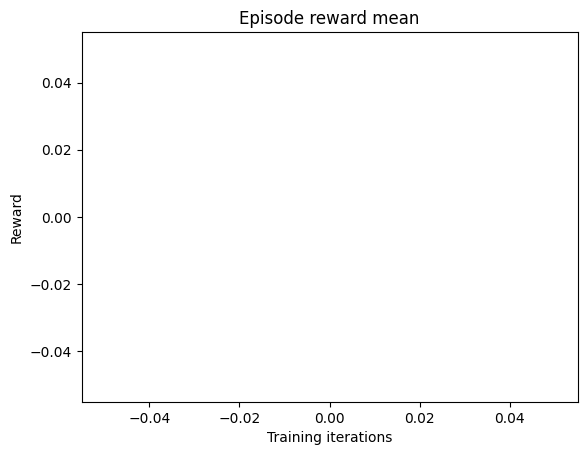

In [27]:
plt.plot(episode_reward_mean_list)
plt.xlabel("Training iterations")
plt.ylabel("Reward")
plt.title("Episode reward mean")
plt.show()

Save Models

In [57]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
PATH1 = '/content/drive/MyDrive/deep learning codes/EIAAPI_DOWNLOAD/solutions/mergedata/State_dict_model1.pt'
PATH = '/content/drive/MyDrive/deep learning codes/EIAAPI_DOWNLOAD/solutions/mergedata/model.pt'
torch.save({'actor_net_state_dict': policy_module.state_dict(),
    'value_net_state_dict': critic_net.state_dict(),

}, PATH1)

torch.save({policy_module, critic_net}, PATH)

Mounted at /content/drive


Load Models

In [60]:

# Load
PATH = '/content/drive/MyDrive/deep learning codes/EIAAPI_DOWNLOAD/solutions/mergedata/model.pt'
critic_net, policy_module = torch.load(PATH,weights_only=False)



UnpicklingError: Weights only load failed. This file can still be loaded, to do so you have two options 
	(1) Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL builtins.set was not an allowed global by default. Please use `torch.serialization.add_safe_globals([set])` to allowlist this global if you trust this class/function.

Check the documentation of torch.load to learn more about types accepted by default with weights_only https://pytorch.org/docs/stable/generated/torch.load.html.

PyTorch Model Updating

In [ ]:
https://clear.ml/docs/latest/docs/guides/frameworks/pytorch/model_updating/#:~:text=To%20update%20a%20model%2C%20use,task%20as%20the%20output%20model.

In [ ]:
k=3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import collections
import numpy as np
import torch
from google.colab import drive
drive.mount('/content/drive')

DDDDataDic =np.empty((8,7), dtype=np.float32)
# We have 3 actions, corresponding to "increase", "decrease", "no change " in fuel price
#self.action_space = spaces.Discrete(3)
# Observations are dictionaries with the agent's Observation which are.
# Forex, Crude oil pric, Fuel price, reward, action



with open('/content/drive/MyDrive/deep learning codes/EIAAPI_DOWNLOAD/solutions/mergedata/DataDic.pt','rb') as rpp:
  DataDic = torch.load(rpp)
DDataDic=DataDic[0]
DDDDataDic=DDataDic[:,:,k]
print(DDDDataDic)

DDDDataDic_array = DDDDataDic.numpy()
DDDDataDic_df = pd.DataFrame(DDDDataDic_array)
DDDDataDic_df.to_csv('/content/drive/MyDrive/deep learning codes/EIAAPI_DOWNLOAD/solutions/mergedata/MatlabARIMAXAData.csv')

n = len(DDDDataDic_df)
# Create a DatetimeIndex with 7795 dates
iddx=pd.date_range(start='2003-01-02', periods=n, freq='D')
# Assign the DatetimeIndex to the 'date' column of DDDDataDic_df
# Set the 'date' column as the index of DDDDataDic_df
DDDDataDic_df.index = iddx

In [ ]:
########
DDDDataDic_df
DDDDataDic_df.columns = ['US$_SDR', 'Brent', 'WTI','OPEC','Fuelprice','Rewards','Actions']
#Selected attribute and target variables
x =DDDDataDic_df[['US$_SDR', 'Brent', 'WTI','OPEC']]
y = DDDDataDic_df['Fuelprice']

In [ ]:
# Define the number of future time steps to forecast
num_forecast_steps = 30
import pandas as pd

# Assuming DDDDataDic_df is a pandas DataFrame with a DatetimeIndex
last_date_30_Daysb = DDDDataDic_df.index[-1] - pd.Timedelta(days=num_forecast_steps)
historical_data=DDDDataDic_df
historical_data = DDDDataDic_df.loc[last_date_30_Daysb:]
# we use the observation data historical_data =["US$_SDR", "Brent", "WTI","OPEC", "Fuelprice"]for the forecasting
historical_data_obs = historical_data.columns[0:5]
#print(historical_data_obs)

# Convert to NumPy and remove singleton dimensions
#sequence_to_plot = X_test.squeeze().cpu().numpy()

# Use the last 30 data points as the starting point
#historical_data_obs= sequence_to_plot[-1]
print(historical_data_obs.shape)

# Initialize a list to store the forecasted values
forecasted_values = []
forecasted_actions = []

# Use the trained model to forecast future values
with torch.no_grad():
	for _ in range(num_forecast_steps*2):
		# Prepare the historical_data tensor
		historical_data_tensor = torch.as_tensor(historical_data_obs).view(1,5).float().to(device)
		# Use the model to predict the next value
		predicted_value = value_module(historical_data_tensor)
		predicted_actions =policy_module(historical_data_tensor)

		# Append the predicted value to the forecasted_values list
		forecasted_values.append(predicted_value[0])
		forecasted_actions.append(predicted_actions[0])
		forecasted_reward=predicted_value[Fuelprice]-historical_data_obs[Fuelprice]

		predicted_valueful=concat([predicted_value,forecasted_reward,predicted_actions])




		# Update the historical_data sequence by removing the oldest value and adding the predicted value
		historical_data = np.roll(historical_data, shift=-1)
		historical_data[-1] = predicted_valueful




# Generate futute date
last_datea =historical_data.index[-1]

# Generate the next 30 dates
future_dates = pd.date_range(start=last_date + pd.DateOffset(1), periods=30)

# Concatenate the original index with the future dates
combined_index = historical_data.index.append(future_dates)


In [36]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets
from google.colab import drive
drive.mount('/content/drive', force_remount=True)




PATH = '/content/drive/MyDrive/deep learning codes/EIAAPI_DOWNLOAD/solutions/mergedata/model.pt'

checkpoint = torch.load(PATH)

new_actor_net_dict = model.state_dict()
new_value_net_dict = model.state_dict()


pretrained_weights_new_actor_net= {}
pretrained_weights_new_value_net= {}


for key, value in checkpoint['actor_net_state_dict'].items():
    new_key = key.replace('module.', '')
    pretrained_weights_new_actor_net[new_key] = value

#new_value_net_state_dict = {}
for key, value in checkpoint['value_net_state_dict'].items():
    new_key1 = key.replace('module.', '')
    pretrained_weights_new_value_net[new_key1] = value

new_actor_net_dict.update(pretrained_weights_new_actor_net)
new_value_net_dict.update(pretrained_weights_new_value_net)

model.load_state_dict(pretrained_weights_new_actor_net, strict = False)
model.load_state_dict(pretrained_weights_new_value_net, strict = False)





Mounted at /content/drive


<ipython-input-36-998e4d4aabb7>:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(PATH)


NameError: name 'model' is not defined

In [ ]:
pretrained_path = torch.load(path to pretrained model)


new_model_dict = model.state_dict()

pretrained_weights = { k:v for k , v in pretrained_path.items() if k in new_model_dict}

new_model_dict.update(pretrained_weights)

model.load_state_dict(pretrained_weights, strict = False)

In [ ]:
new_model_dict.update(pretrained_weights)

In [ ]:
new_value_net.load_state_dict(new_value_net_state_dict)
new_actor_net.load_state_dict(new_actor_net_state_dict)

In [ ]:
new_value_net.update(new_value_net_state_dict)
new_actor_net.update(new_actor_net_state_dict)

In [ ]:
print(new_actor_net)

Forecasting With models

In [37]:
!pip install graphviz
!pip install torchviz

In [34]:
!pip install torchview

In [38]:
from torchview import draw_graph
batch_size = frames_per_batch

model_graph = draw_graph(critic_net, input_size=(1, 6250, 2, 5), device=device)
model_graph.visual_graph
# device='meta' -> no memory is consumed for visualization
#model_graph1 = draw_graph(value_net, input_size=(780,1,5), device=device)
#model_graph1.visual_graph


RuntimeError: Failed to run torchgraph see error message

In [ ]:
import graphviz
graphviz.set_jupyter_format('png')
#graphviz.Source(model_graph1.visual_graph)
graphviz.Source(model_graph.visual_graph)

In [ ]:
model_graph = draw_graph(actor_net, input_size=(7800,1,5), device=device)

In [ ]:
print(model_graph.visual_graph)